In [193]:
import pandas as pd 
import seaborn as sns
DS = pd.read_csv(r'\Users\oscar\OneDrive\Documents\Year4_Project\QNN_Ideas\New_prams_1.csv')
TEST = pd.read_csv(r'\Users\oscar\OneDrive\Documents\Year4_Project\Muon_data_1.csv')

#DS = pd.read_csv(r"C:\Users\oscar\OneDrive\Documents\Year4_Project\QNN_Ideas\Above_16GeV_Train_DATA.csv")
#DF = DS.drop(['TOB_ET', 'offline_ele_pt','ID', 'TOB_eta'], axis=1)
#columns_to_keep = ['label', 'Had_2', 'Had_5', 'L0_5', 'L1_17', 'L1_18', 'L1_19', 'L1_20', 'L2_17', 'L2_18', 'L2_19', 'L2_20']

#columns_to_keep = ['label', 'Had_5', 'L2_18', 'L2_19', 'L1_18', 'L1_19', 'L1_20', 'L2_20', 'L1_17', 'L2_17', 'L0_5', 'Had_8', 'Had_2', 'L2_21', 'Had_4', 'Had_6', 'L2_16', 'L3_5', 'L2_15', 'Had_7', 'Had_9', 'Had_3', 'L2_22', 'L2_7', 'L1_16', 'L1_21', 'L2_32', 'Had_1', 'L2_8', 'L2_31', 'L2_30', 'L3_8', 'L3_2', 'L2_5', 'L1_29', 'L2_6', 'L1_30', 'L2_29', 'L1_32', 'L1_22', 'L2_4', 'L2_33', 'L2_27', 'L2_10', 'L1_15', 'L1_7', 'L1_6', 'L2_28', 'L1_31', 'L2_23', 'L1_8']
#columns_to_keep = ['label' , 'L0_centre_sum',	'L1_centre_sum',	'L1_wide_centre_sum',	'L2_centre_sum',	'L2_wide_centre_sum', 'L2_spread_sum',	'L2_vertical_sum',	'L3_centre_sum',	'Had_centre_sum',	'Had_peripheral_sum',	'Had_out_sum','TOB_eta']
#columns_to_keep = ['label' ,'L1_centre_sum', 'L1_wide_centre_sum', 'L1_wider_centre_sum','L2_centre_sum', 'L2_wide_centre_sum', 'L2_spread_sum', 'L2_vertical_sum', 'L3_centre_sum', 'Had_centre_sum', 'Had_peripheral_sum', 'Had_out_sum', 'TOB_eta']
columns_to_keep = ['label' ,'L1_centre_sum', 'L1_wide_centre_sum', 'L1_wider_centre_sum','L2_centre_sum', 'L2_wide_centre_sum', 'L2_spread_sum', 'L2_vertical_sum', 'L3_centre_sum', 'Had_centre_sum', 'Had_peripheral_sum', 'Had_out_sum']
DF = DS[columns_to_keep]

DF.head()


,label,L1_centre_sum,L1_wide_centre_sum,L1_wider_centre_sum,L2_centre_sum,L2_wide_centre_sum,L2_spread_sum,L2_vertical_sum,L3_centre_sum,Had_centre_sum,Had_peripheral_sum,Had_out_sum
0,0,2.85,3.300,2.025,7.700,3.425,0.775,2.550,0.0,0.0,0.0,0.0
1,0,4.20,0.825,0.000,11.025,3.650,0.000,3.975,0.0,0.0,0.0,0.0
2,1,5.60,0.000,0.000,23.125,2.475,0.000,0.000,0.0,0.0,0.0,0.0
3,1,0.00,4.475,0.000,0.000,11.300,1.700,5.350,0.0,0.0,1.5,0.0
4,1,0.00,4.575,0.000,0.000,14.400,2.750,1.100,0.0,0.0,0.0,0.0


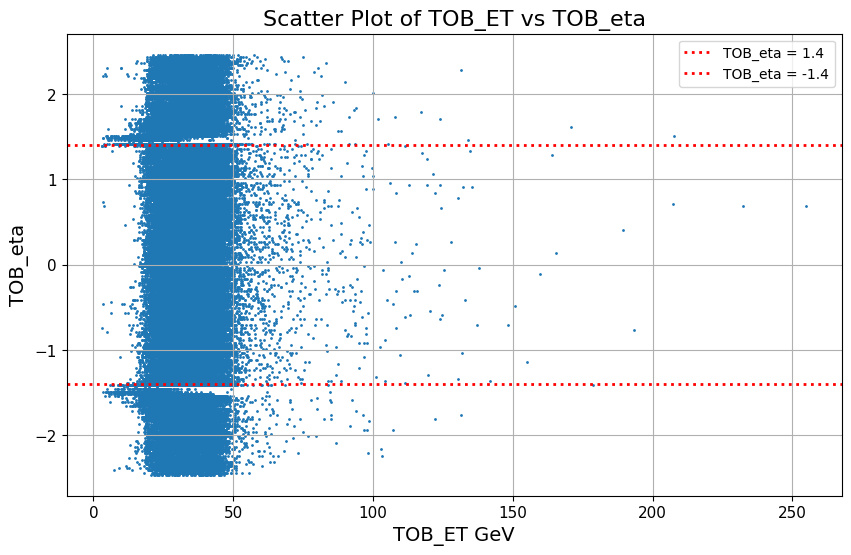

In [194]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(TEST['TOB_ET'], TEST['TOB_eta'], s=1)  
plt.ylabel('TOB_eta', fontsize=14)
plt.xlabel('TOB_ET GeV' , fontsize=14)
plt.title('Scatter Plot of TOB_ET vs TOB_eta' , fontsize=16)
plt.axhline(y=1.4, color='r', linestyle=':', linewidth=2, label='TOB_eta = 1.4')
plt.axhline(y=-1.4, color='r', linestyle=':', linewidth=2, label='TOB_eta = -1.4')
plt.tick_params(axis='both', which='major', labelsize=11) 
plt.grid(True)
plt.legend()
plt.show()

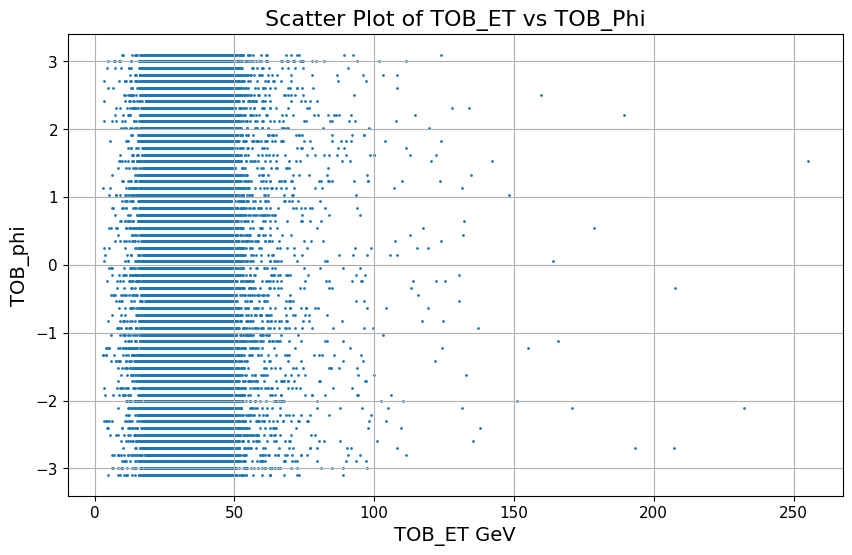

In [195]:
plt.figure(figsize=(10, 6))
plt.scatter(TEST['TOB_ET'], TEST['TOB_phi'], s=1)  # 's' controls the size of the dots
plt.ylabel('TOB_phi', fontsize=14)
plt.xlabel('TOB_ET GeV', fontsize=14)
plt.title('Scatter Plot of TOB_ET vs TOB_Phi', fontsize=16)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=11) 
plt.show()

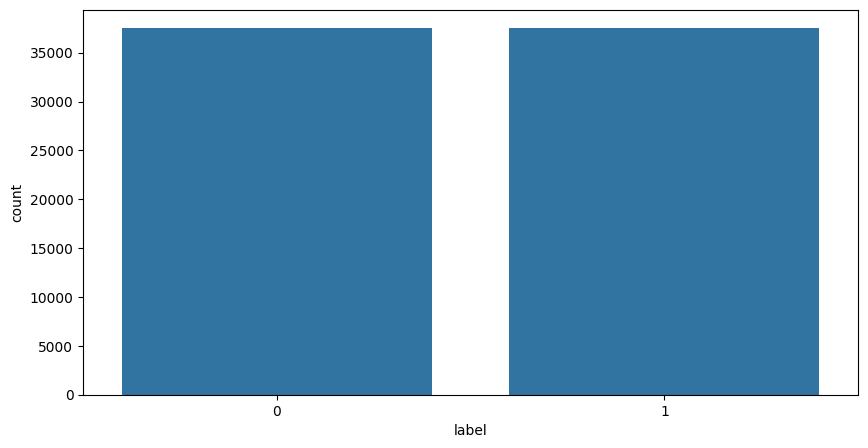

In [196]:
ax = sns.countplot(x ="label", data = DF)


In [197]:
from sklearn.model_selection import train_test_split

X = DF.drop(["label"], axis=1)  
Y = DF["label"]  


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train.shape

(56274, 11)

In [198]:
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

XGBoost = XGBClassifier(
    n_estimators=32,  # Reduced number of estimators
    learning_rate=1.15,
    verbose=1,
    validation_fraction=0.2,  # For early stopping
    n_iter_no_change=10,# Number of iterations with no improvement to stop
    
    max_depth= 2
)

# Fit the model to your training data
XGBoost.fit(
    X_train, 
    Y_train, 
    eval_set=[(X_test, Y_test)], # Use the test set for early stopping
    verbose=1,
    early_stopping_rounds=10 # Set early stopping rounds
)

XGBoost.fit(X_train, Y_train)

Y_pred = XGBoost.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

[0]	validation_0-logloss:0.46728


[1]	validation_0-logloss:0.41863
[2]	validation_0-logloss:0.35873
[3]	validation_0-logloss:0.32477
[4]	validation_0-logloss:0.31139
[5]	validation_0-logloss:0.30448
[6]	validation_0-logloss:0.29887
[7]	validation_0-logloss:0.29326
[8]	validation_0-logloss:0.28790
[9]	validation_0-logloss:0.28464
[10]	validation_0-logloss:0.28078
[11]	validation_0-logloss:0.27939
[12]	validation_0-logloss:0.27739
[13]	validation_0-logloss:0.27402
[14]	validation_0-logloss:0.27126
[15]	validation_0-logloss:0.26980
[16]	validation_0-logloss:0.26719
[17]	validation_0-logloss:0.26673
[18]	validation_0-logloss:0.26580
[19]	validation_0-logloss:0.26417
[20]	validation_0-logloss:0.26379
[21]	validation_0-logloss:0.26338
[22]	validation_0-logloss:0.26259
[23]	validation_0-logloss:0.26148
[24]	validation_0-logloss:0.26022
[25]	validation_0-logloss:0.25957
[26]	validation_0-logloss:0.25895
[27]	validation_0-logloss:0.25820
[28]	validation_0-logloss:0.25765
[29]	validation_0-logloss:0.25718
[30]	validation_0-loglo

[21:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_iter_no_change", "validation_fraction", "verbose" } are not used.

[21:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_iter_no_change", "validation_fraction", "verbose" } are not used.



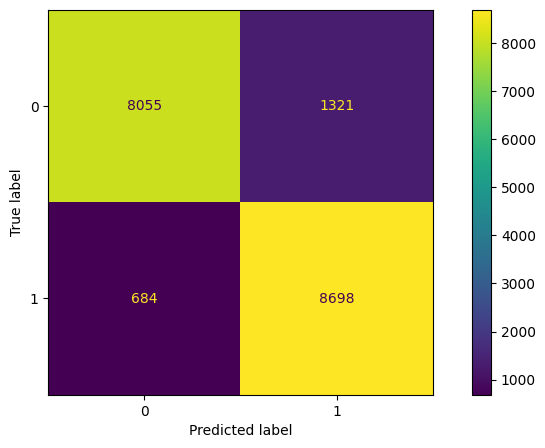

In [199]:
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()


In [200]:
import shap
import numpy as np
import pandas as pd


# Assuming `model` is your trained XGBoost model (e.g., after fitting with your training data)
# Make sure to replace `model` with the actual variable name of your trained model

# Create a SHAP explainer
explainer = shap.TreeExplainer(XGBoost)
shap_values = explainer.shap_values(X_train)

# Sum the SHAP values for each feature across all samples to get a measure of overall importance
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': shap_sum})
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 30 features
top_50_features = importance_df.head(50)
print(top_50_features)

# Plot summary plot for the top 30 features
#shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar", max_display=15)


                feature  importance
9    Had_peripheral_sum    1.235178
5         L2_spread_sum    1.164493
1    L1_wide_centre_sum    1.085463
8        Had_centre_sum    0.960995
0         L1_centre_sum    0.803050
3         L2_centre_sum    0.723700
2   L1_wider_centre_sum    0.687853
4    L2_wide_centre_sum    0.641656
10          Had_out_sum    0.587324
7         L3_centre_sum    0.357355
6       L2_vertical_sum    0.327456


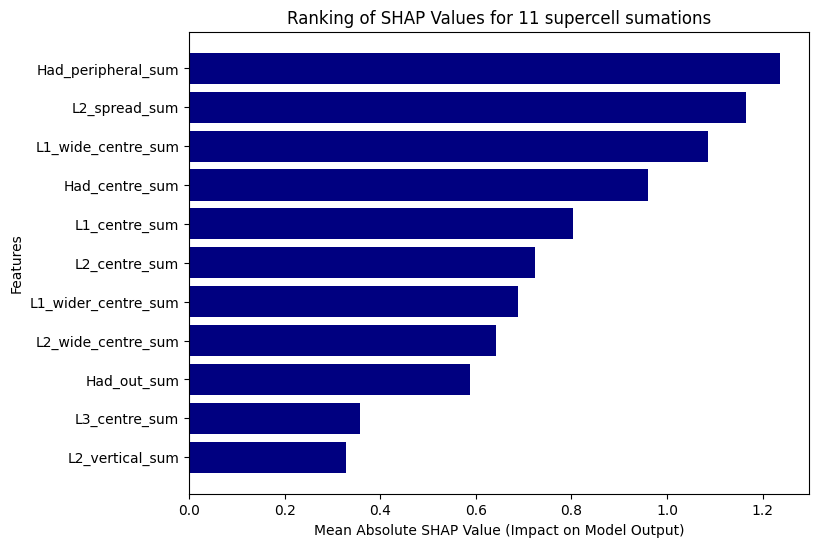

In [201]:
# Plot the SHAP values for the top features as a bar chart
top_features = top_50_features.head(15)  # Assuming you want the top 15 features
shap_values_summary = np.abs(shap_values).mean(0)
top_shap_values_summary = shap_values_summary[top_features.index]


plt.figure(figsize=(8, 6))
plt.barh(top_features['feature'], top_features['importance'], color='navy')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.xlabel('Mean Absolute SHAP Value (Impact on Model Output)')
plt.ylabel('Features')
plt.title('Ranking of SHAP Values for 11 supercell sumations')
plt.show()


In [202]:
# Plot summary plot for the top features using a bee swarm plot
#shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type='dot', max_display=15)


In [203]:
from sklearn.metrics import f1_score

f1_score(Y_test, Y_pred)

0.8966548116076491

In [204]:
from sklearn.metrics import roc_auc_score

y_scores = XGBoost.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(Y_test, y_scores)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9548425003073929


In [205]:
from joblib import dump

model_filename = 'BDT_model_11prams_32trees_2depth_XGBoost_1.joblib'
dump(XGBoost, model_filename)


['BDT_model_11prams_32trees_2depth_XGBoost_1.joblib']

The model contains 32 trees.


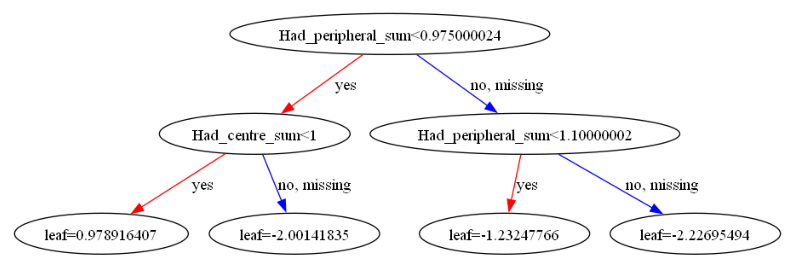

In [206]:
import xgboost as xgb
import matplotlib.pyplot as plt



# Get the number of boosting rounds from the model
number_of_trees = XGBoost.get_booster().num_boosted_rounds()

print(f"The model contains {number_of_trees} trees.")

# Visualize the first tree (index 0)
# Optionally, you can change the index to visualize other trees
xgb.plot_tree(XGBoost, num_trees=0)
plt.rcParams['figure.figsize'] = [10,5]  
plt.show()


In [207]:
import shap
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt


# Initialize SHAP Explainer with your XGBoost model
explainer = shap.Explainer(XGBoost)

# Select a sample from the test set for explanation
sample = X_test.iloc[[1]]  # Ensuring input is in the expected format

# Compute SHAP values for the selected sample
shap_values = explainer.shap_values(sample)

# Visualize the SHAP values for the sample
shap.initjs()  
# For a single sample, use force_plot for an interactive plot, or summary_plot for static
shap.force_plot(explainer.expected_value, shap_values[0], sample)

)


In [208]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier
import numpy as np


# Initialize variables to store the best score and corresponding learning rate
best_f1 = 0
best_lr = 0

# Define the range of learning rates to test
learning_rates = np.arange(0.1, 2.1, 0.05)

for lr in learning_rates:
    XGBoost = XGBClassifier(
        n_estimators=64,
        learning_rate=lr,
        verbose=0,
        validation_fraction=0.2,
        n_iter_no_change=100,
        max_features='sqrt',
        max_depth=4
    )
    
    # Fit the model to your training data
    XGBoost.fit(
        X_train, 
        Y_train, 
        eval_set=[(X_test, Y_test)],
        verbose=0,
        early_stopping_rounds=10
    )
    
    # Predict and evaluate
    Y_pred = XGBoost.predict(X_test)
    f1 = f1_score(Y_test, Y_pred, average='binary', pos_label=1)  # Assuming label 1 is the positive class
    #print(f"Learning Rate: {lr}, F1-Score for Label 1: {f1}")
    
    # Update best score and learning rate if current model is better
    if f1 > best_f1:
        best_f1 = f1
        best_lr = lr

print(f"Best Learning Rate: {best_lr}, Best F1-Score for Label 1: {best_f1}")


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[21:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "n_iter_no_change", "validation_fraction", "verbose" } are not used.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[21:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "n_iter_no_change", "validation_fraction", "verbose" } are not used.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` in

Best Learning Rate: 0.3500000000000001, Best F1-Score for Label 1: 0.9091471589151284


In [209]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import numpy as np


# Initialize variables to store the best average F1-score and corresponding learning rate
best_avg_f1 = 0
best_lr = 0

# Define the range of learning rates to test
learning_rates = np.arange(0.1, 2.1, 0.5)

for lr in learning_rates:
    XGBoost = XGBClassifier(
        n_estimators=64,
        learning_rate=lr,
        verbose=0,
        max_depth=4
    )
    
    # Fit the model to your training data
    XGBoost.fit(
        X_train, 
        Y_train, 
        eval_set=[(X_test, Y_test)],
        verbose=0,
        early_stopping_rounds=10
    )
    
    # Predict and evaluate
    Y_pred = XGBoost.predict(X_test)
    f1_label_1 = f1_score(Y_test, Y_pred, average='binary', pos_label=1)  # F1-score for label 1
    f1_label_0 = f1_score(Y_test, Y_pred, average='binary', pos_label=0)  # F1-score for label 0
    avg_f1 = (f1_label_1 + f1_label_0) / 2  # Average F1-score for labels 1 and 0
    
    #print(f"Learning Rate: {lr}, Average F1-Score: {avg_f1}")
    
    # Update best score and learning rate if current model is better
    if avg_f1 > best_avg_f1:
        best_avg_f1 = avg_f1
        best_lr = lr

print(f"Best Learning Rate: {best_lr}, Best Average F1-Score: {best_avg_f1}")


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[21:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[21:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.



Best Learning Rate: 0.6, Best Average F1-Score: 0.9053963130482322


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[21:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[21:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

